In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


In [2]:
import matplotlib.pyplot as plt # graphics
import seaborn as sns # graphics too
import datetime as dt # for date type analysis 
import plotly.graph_objects as go # graphics
import nbformat # jupyter notebook schema
import calendar # handle dates

In [3]:
data = pd.read_csv('/kaggle/input/ecommerce-data/data.csv',encoding='unicode_escape')

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
df = data.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'The total number of duplicated values in the dataset: {dup}')

The total number of duplicated values in the dataset: 5268


In [11]:
# Missing Values/Null Values Count
missing = df.columns[df.isnull().any()].tolist()
print(missing)

print('Missing Data count')
print(df[missing].isnull().sum().sort_values(ascending=False))
print()

print('++'*12)
print()
print('Missing Data Percentage')
print(round(df[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

['Description', 'CustomerID']
Missing Data count
CustomerID     135080
Description      1454
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


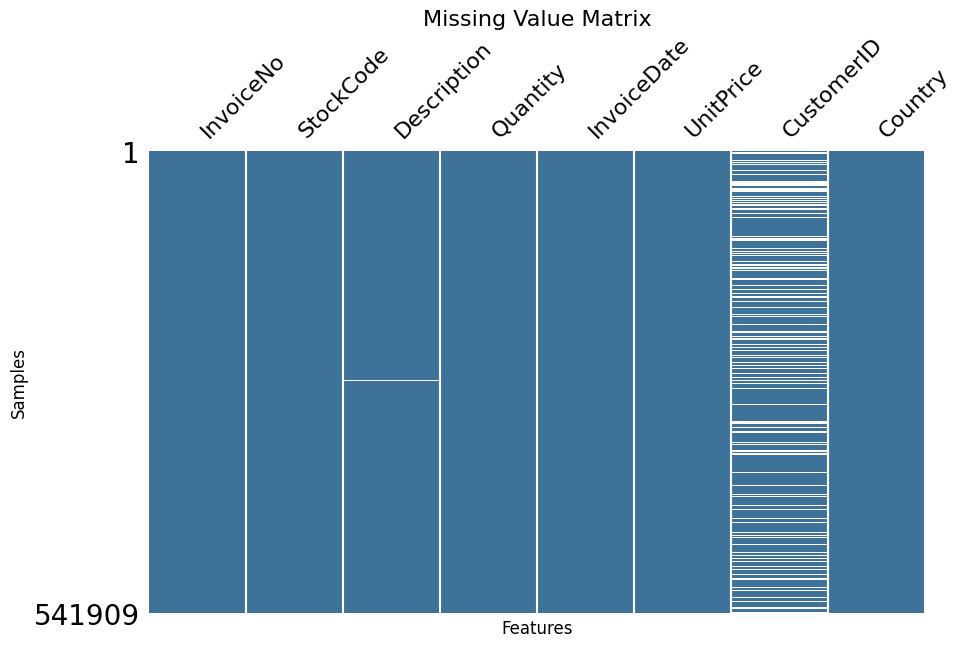

In [13]:
import missingno as msno

# create missing value matrix plot
msno.matrix(df, figsize=(10,6), sparkline=False, color=(0.25, 0.45, 0.6))

# customize plot
plt.title('Missing Value Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.show()

24.93% of items purchased are not assigned to any customer. We can remove this as we can't use it for further analysis.
- **The dataset is of transnational dataset which contains all the transactions occuring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.**
- **The company mainly sells unique all-occassion gifts.**
- **Many customers of the company are wholesalers.**
- **The dataset contains 541909 rows and 8 columns.**
- **There are 2 columns of datatype float64, 1 column of datatype int64, 4 columns of datatype object and 1 column of datatype datetime64.**
- **The total number of duplicated values in the dataset: 5268**
- **Missing Data Percentage**
     - **CustomerID -    24.93%**
     - **Description -     0.27%**

In [15]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
    print("Number of unique values in",i,"is",df[i].nunique())

Number of unique values in InvoiceNo is 25900
Number of unique values in StockCode is 4070
Number of unique values in Description is 4223
Number of unique values in Quantity is 722
Number of unique values in InvoiceDate is 23260
Number of unique values in UnitPrice is 1630
Number of unique values in CustomerID is 4372
Number of unique values in Country is 38


In [16]:
df = df.dropna()
df = df[~((df['Quantity'] < 0) | (df['UnitPrice']<=0))]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397884.0,12.988238,179.331775,1.000,2.00,6.00,12.00,80995.00
UnitPrice,397884.0,3.116488,22.097877,0.001,1.25,1.95,3.75,8142.75
CustomerID,397884.0,15294.423453,1713.141560,12346.000,13969.00,15159.00,16795.00,18287.00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst = False)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [19]:
df['Sales'] = df['Quantity'] * df['UnitPrice'] 
df['Quarter'] = pd.PeriodIndex(df['InvoiceDate'], freq = 'Q')
df['Quarter'] = df['Quarter'].astype('string')
df['Month'] = df['InvoiceDate'].dt.month
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Quarter,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010Q4,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010Q4,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010Q4,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010Q4,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010Q4,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011Q4,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011Q4,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011Q4,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011Q4,12


<Axes: xlabel='Country'>

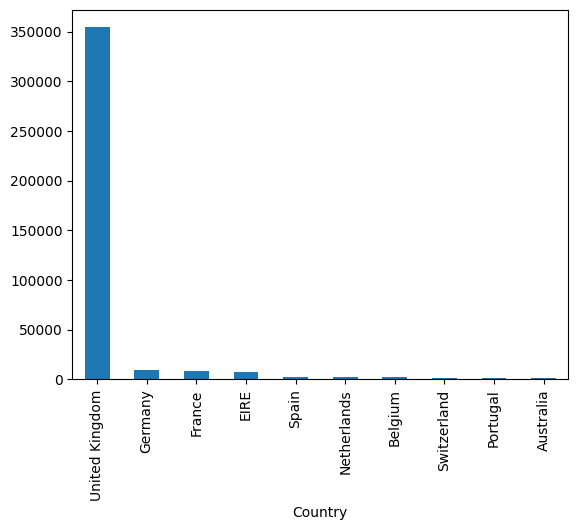

In [20]:
df['Country'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

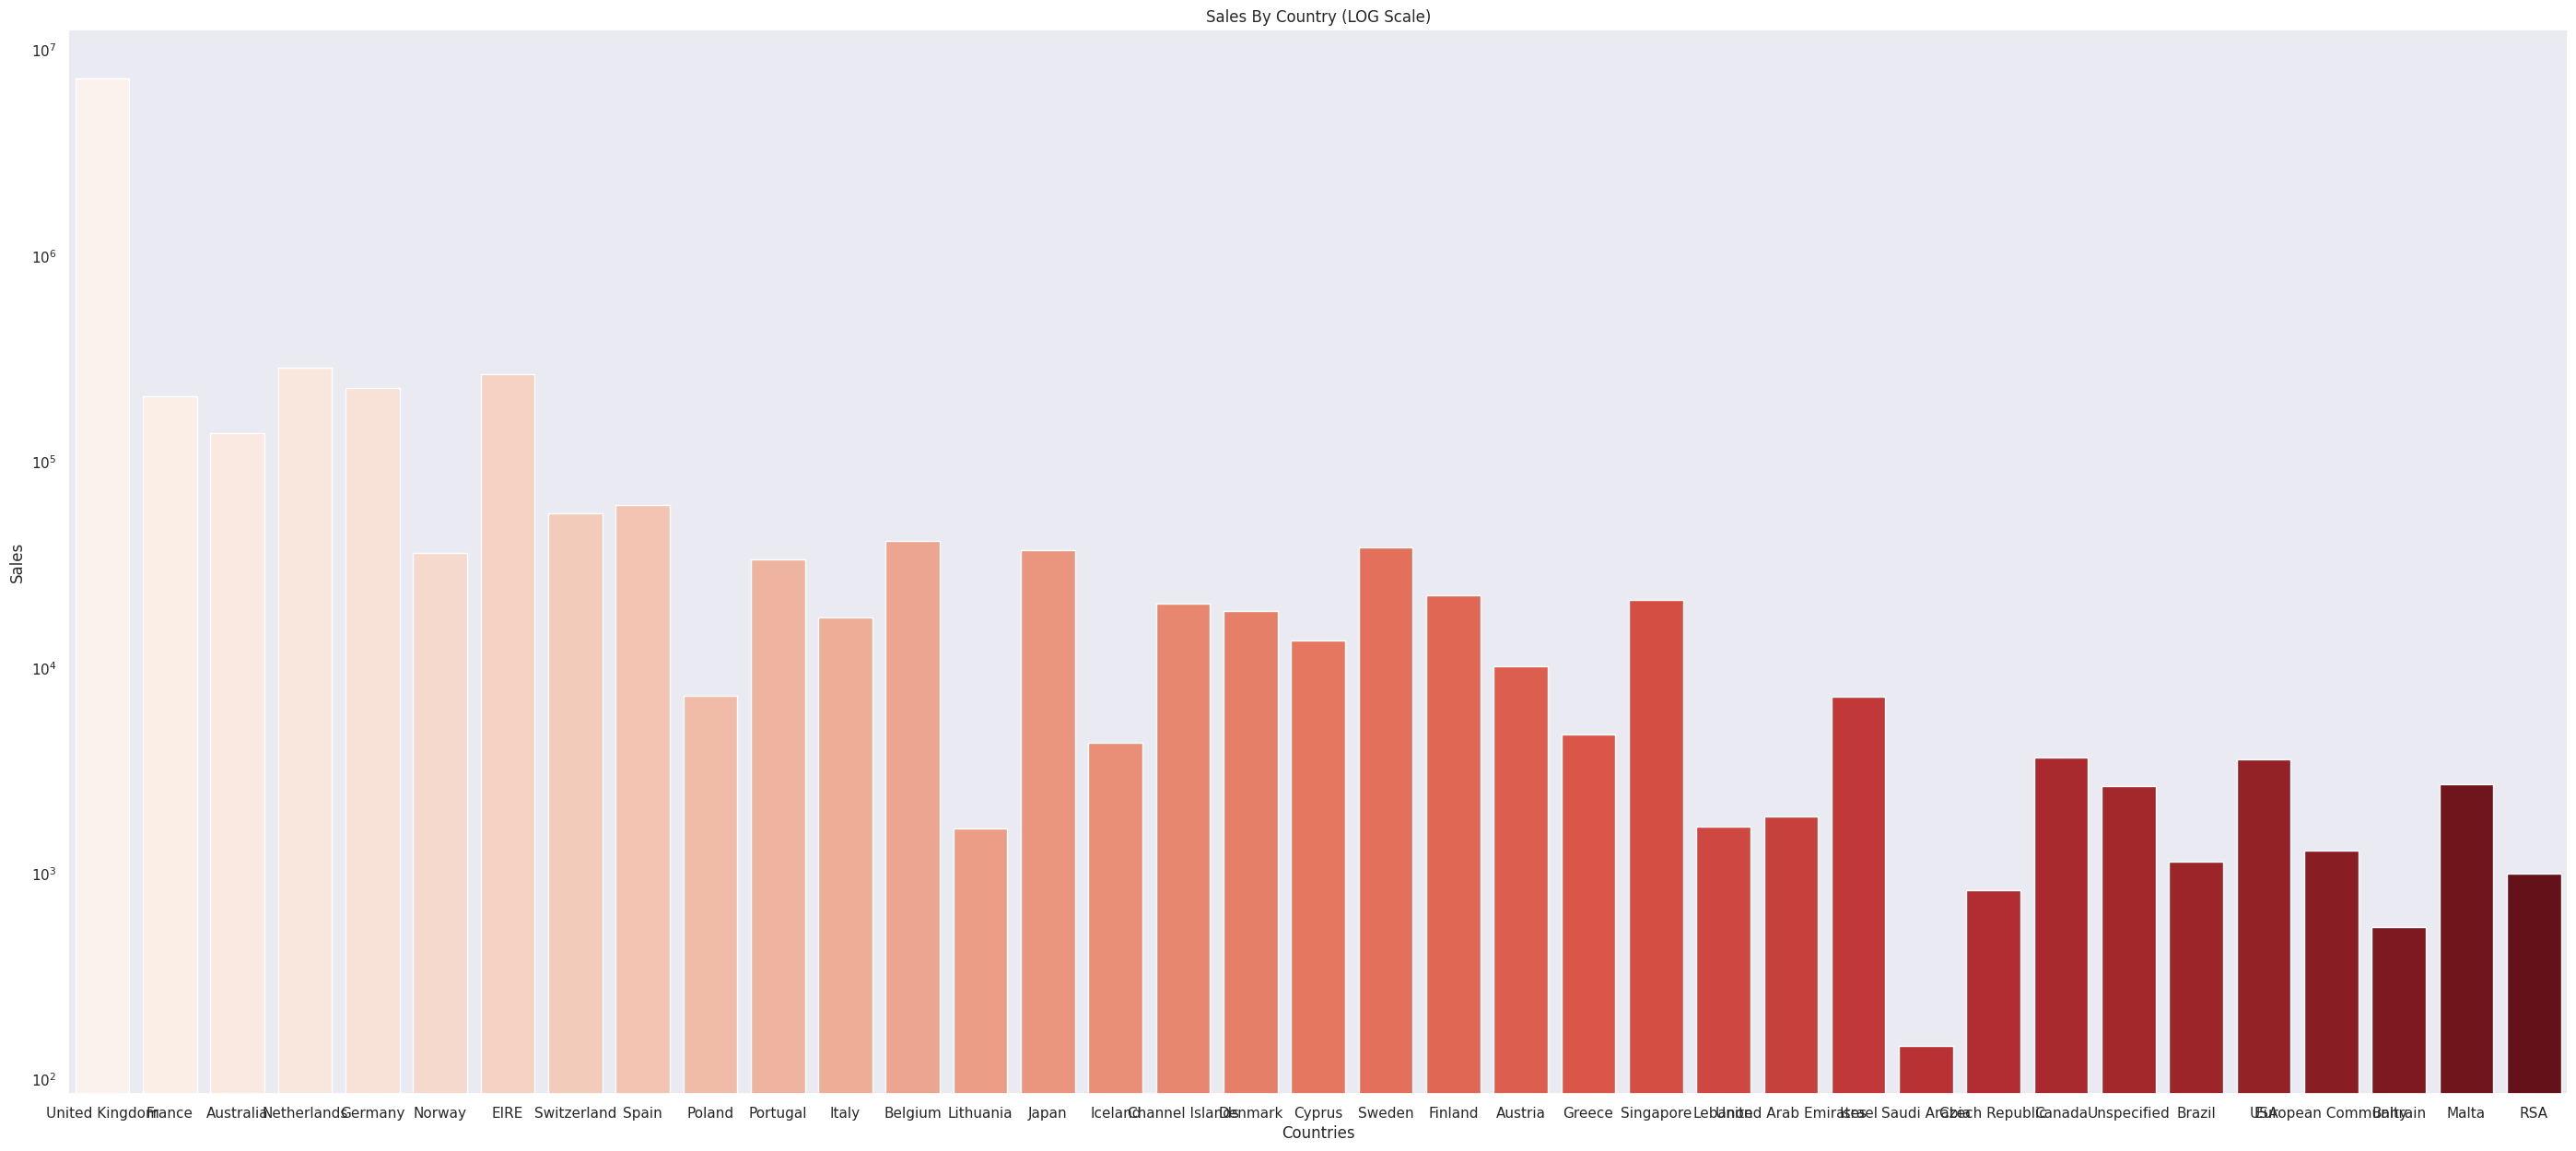

In [21]:
countries = df['Country'].unique()
row_val = []
# countries.remove('United Kingdom')
for c in countries:
    row_val.append(df[df['Country']==c]['Sales'].sum())
    
    
sns.set(style="dark") 
plt.figure(figsize=(35,15)) 
plt.yscale('log')
sns.barplot(x=countries, y=row_val, palette="Reds")

# Customize the plot
plt.xlabel("Countries")  # Label for the x-axis
plt.ylabel("Sales")  # Label for the y-axis
plt.title("Sales By Country (LOG Scale)")  # Title of the plot (optional)

# Show the plot
plt.show()

In [22]:
top_countries = df['Country'].value_counts().sort_values(ascending=False).head(10).index.to_list()

In [23]:
top_countries

['United Kingdom',
 'Germany',
 'France',
 'EIRE',
 'Spain',
 'Netherlands',
 'Belgium',
 'Switzerland',
 'Portugal',
 'Australia']

In [24]:
df.groupby('Country')['Sales'].mean().sort_values(ascending=False).head(10)

Country
Netherlands    121.003111
Australia      117.192310
Japan          116.561900
Singapore       95.852658
Sweden          85.096075
Denmark         49.882474
Lithuania       47.458857
Lebanon         37.641778
EIRE            36.697886
Brazil          35.737500
Name: Sales, dtype: float64

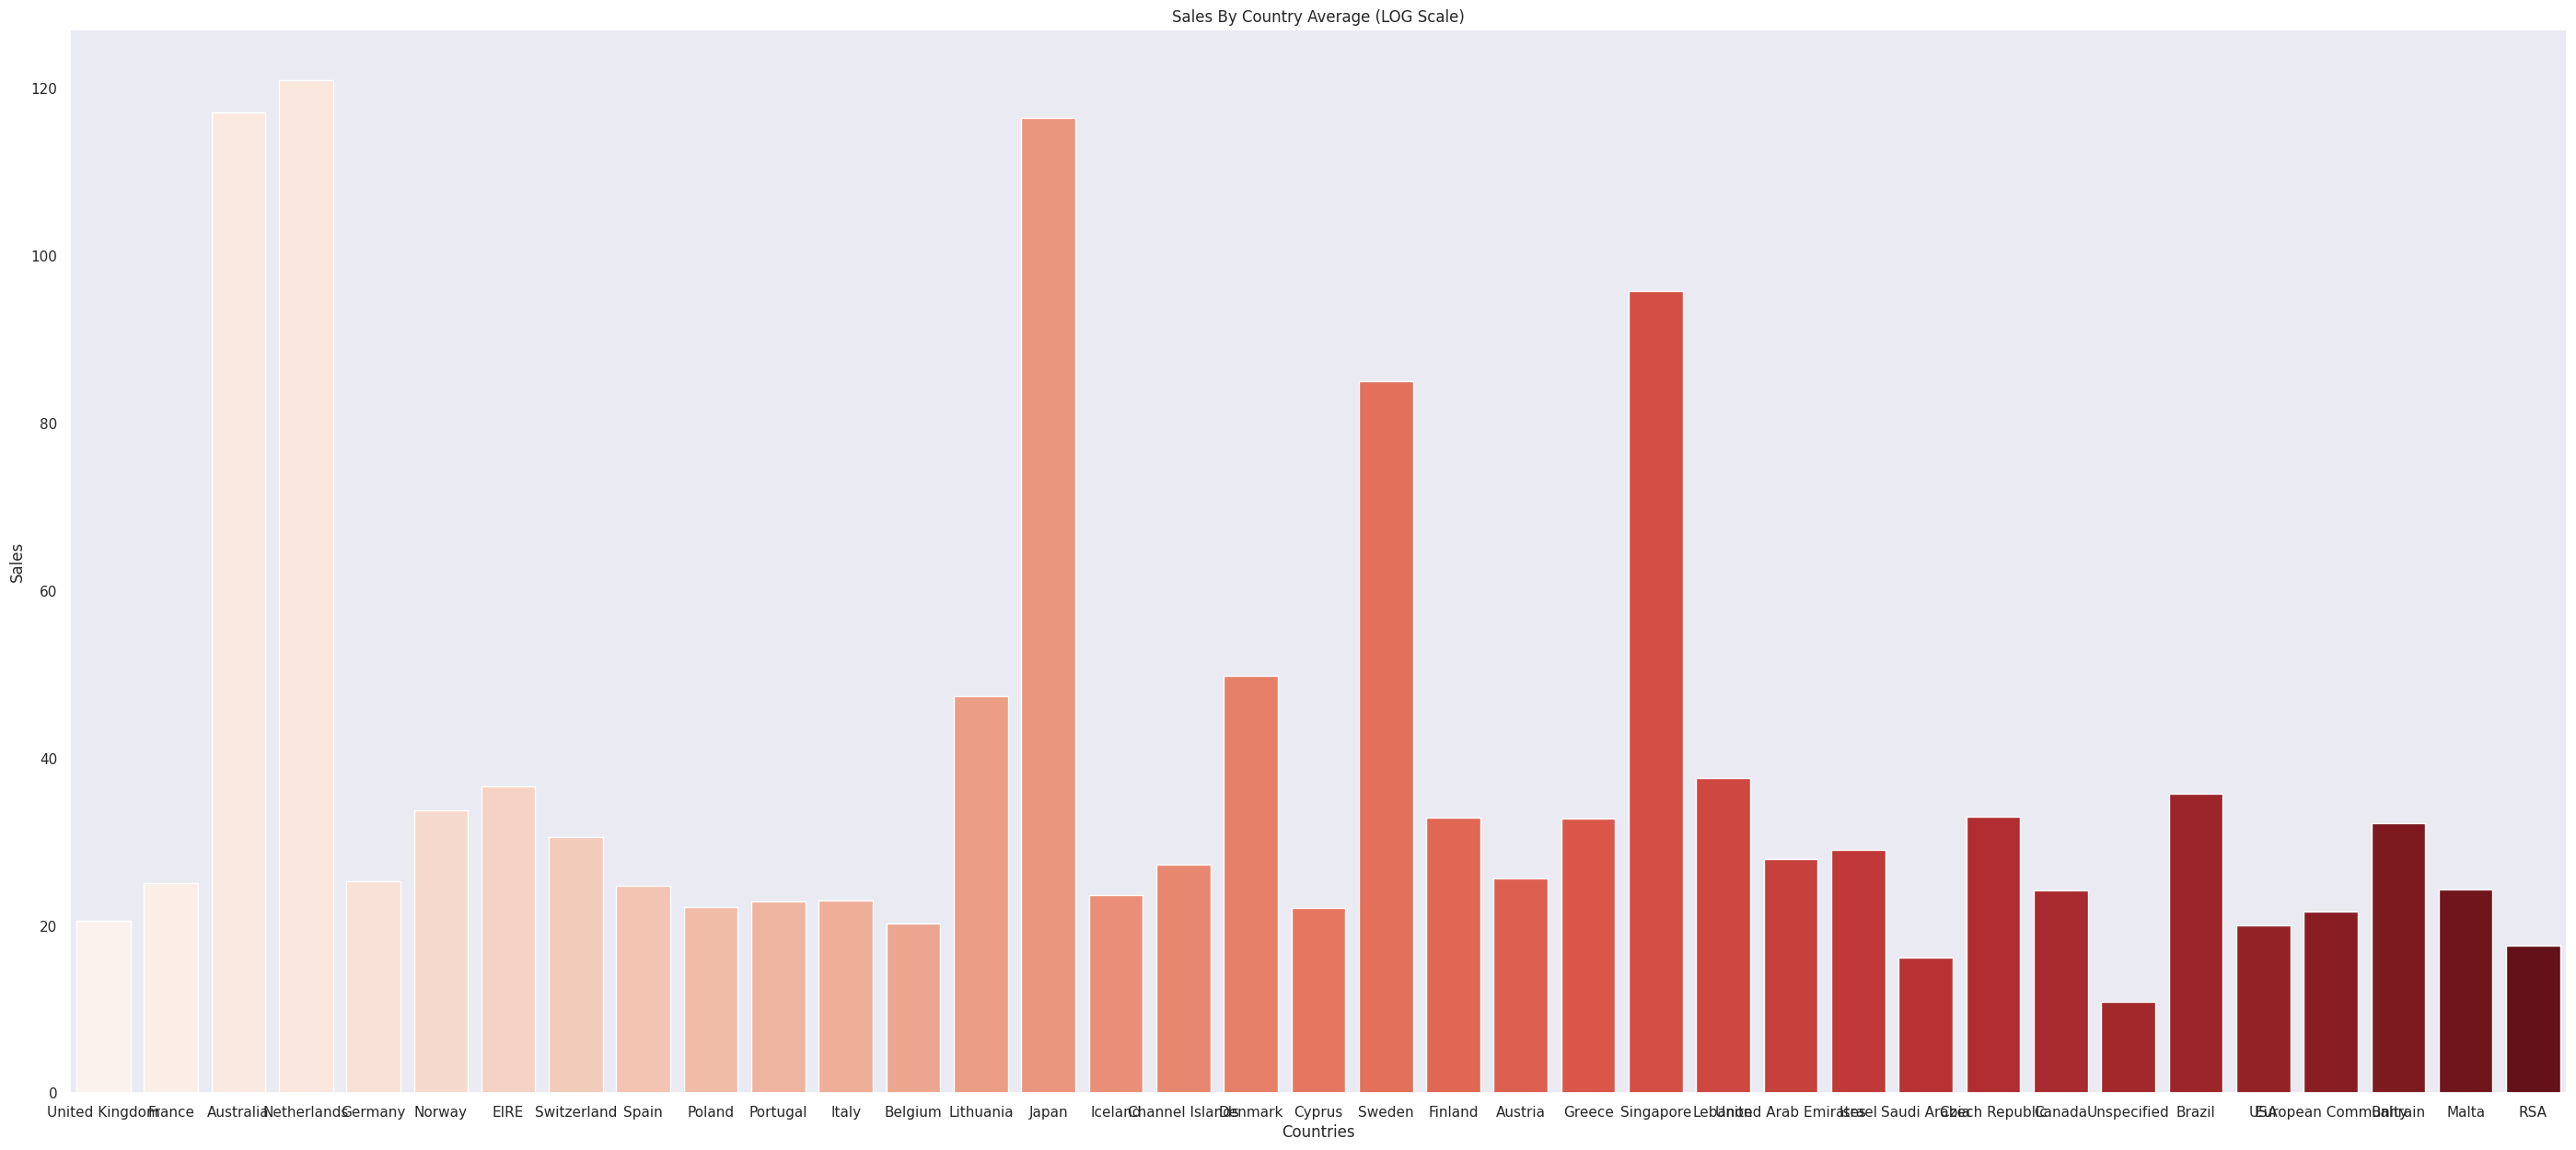

In [25]:
avg_unitcost_countries = []
for c in countries:
    avg_unitcost_countries.append(df[df['Country']==c]['Sales'].mean())
sns.set(style="dark") 
plt.figure(figsize=(35,15)) 
#plt.yscale('log')
sns.barplot(x=countries, y=avg_unitcost_countries, palette="Reds")

# Customize the plot
plt.xlabel("Countries")  # Label for the x-axis
plt.ylabel("Sales")  # Label for the y-axis
plt.title("Sales By Country Average (LOG Scale)")  # Title of the plot (optional)

# Show the plot
plt.show()

In [26]:
df.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False).head(10)

Country
Singapore             58.333288
Canada                 6.030331
Portugal               5.925472
Cyprus                 5.710391
Lebanon                5.387556
Finland                5.296993
Norway                 5.287087
Malta                  4.867768
European Community     4.830000
Italy                  4.717955
Name: UnitPrice, dtype: float64

In [27]:
df[df['Country'] == 'Singapore'].describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales,Month
count,222.000000,222,222.000000,222.0,222.000000,222.000000
mean,23.608108,2011-05-22 10:15:23.513513728,58.333288,12744.0,95.852658,5.175676
min,1.000000,2011-01-25 13:26:00,0.190000,12744.0,2.340000,1.000000
25%,8.500000,2011-02-11 19:20:15,1.250000,12744.0,17.700000,1.750000
50%,12.000000,2011-04-05 10:58:00,2.100000,12744.0,36.750000,4.000000
75%,24.000000,2011-07-18 11:55:00,4.150000,12744.0,60.000000,7.000000
max,288.000000,2011-10-19 11:18:00,3949.320000,12744.0,3949.320000,10.000000
std,27.846940,NaN,373.926856,0.0,369.856236,3.079746


95% Data for Singapore lies in 10.827499999999972


<Axes: xlabel='UnitPrice'>

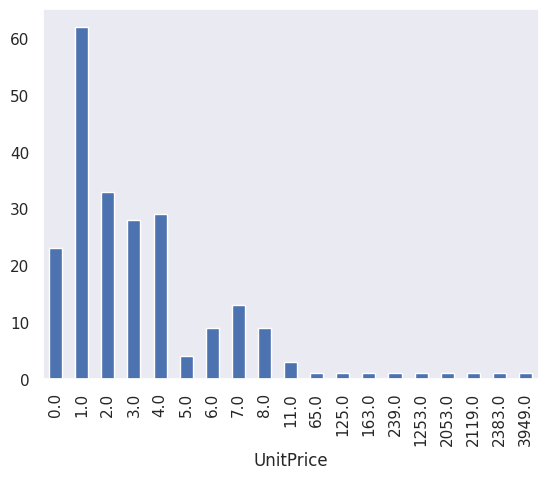

In [28]:
print(f"95% Data for Singapore lies in {df[df['Country'] == 'Singapore']['UnitPrice'].quantile(0.95)}")
df[df['Country']=='Singapore']['UnitPrice'].round().value_counts().sort_index().plot(kind='bar')

95% Data for Canada lies in 9.225


<Axes: xlabel='UnitPrice'>

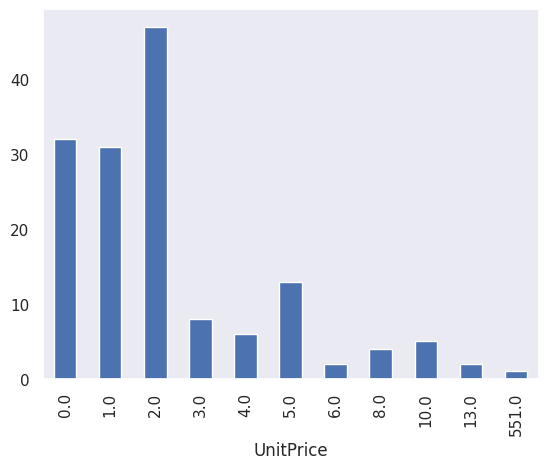

In [29]:
print(f"95% Data for Canada lies in {df[df['Country'] == 'Canada']['UnitPrice'].quantile(0.95)}")
df[df['Country']=='Canada']['UnitPrice'].round().value_counts().sort_index().plot(kind='bar')

In [30]:
df[df['Country'] == 'Singapore'].groupby('StockCode')['UnitPrice'].mean().sort_values(ascending=False).head(10)

StockCode
M        1736.985714
22655     125.000000
22929      65.000000
23020      11.150000
22423      10.950000
22760      10.950000
21621       8.500000
22193       8.500000
23543       8.250000
22192       8.075000
Name: UnitPrice, dtype: float64

In [31]:
df[(df['Country'] == 'Singapore') & (df['StockCode'] == 'M')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Quarter,Month
144825,548813,M,Manual,1,2011-04-04 13:03:00,162.60,12744.0,Singapore,162.60,2011Q2,4
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore,2382.92,2011Q2,4
144827,548813,M,Manual,1,2011-04-04 13:03:00,239.30,12744.0,Singapore,239.30,2011Q2,4
144828,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744.0,Singapore,1252.95,2011Q2,4
144829,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore,2053.07,2011Q2,4
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore,3949.32,2011Q4,10
406407,571751,M,Manual,1,2011-10-19 11:18:00,2118.74,12744.0,Singapore,2118.74,2011Q4,10


In [32]:
#unit prices differ by countries from same stock code 'M'
df[df['StockCode'].isin(df[(df['Country'] == 'Singapore') & (df['UnitPrice'] > 10.82)]['StockCode'].values) & (df['Country'] != 'Singapore') & (df['StockCode'] == 'M')].groupby('Country')['UnitPrice'].mean().sort_values(ascending=False).head(15)

Country
France             1895.474000
EIRE               1687.170000
Portugal            603.241429
Cyprus              320.690000
Channel Islands     293.000000
Germany             287.031250
Norway              280.100000
Finland             275.600000
United Kingdom       66.506734
Sweden               30.000000
Name: UnitPrice, dtype: float64

In [33]:
# Number of Product Sold
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3665,18532,4338


**number of products purchased in every transaction:**

In [34]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
per_transaction = temp.rename(columns = {'InvoiceDate':'Number of products'})
per_transaction[:15].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


The first lines of this list shows several things worthy of interest:

1. the existence of entries with the prefix C for the InvoiceNo variable indicates transactions that have been canceled
2. the existence of users who only came once and only purchased one product (e.g. nº12346)
3. the existence of frequent users that buy a large number of items at each order

In [35]:
# Number of orders cancelled
per_transaction['order_canceled'] = per_transaction['InvoiceNo'].apply(lambda x:int('C' in x))
display(per_transaction[:5])
n1 = per_transaction['order_canceled'].sum()
n2 = per_transaction.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0


Number of orders canceled: 3654/22190 (16.47%) 


**Top Products Sold are**

In [36]:
# Top 50 Products
top_stock = df['StockCode'].value_counts().head(50).index.to_list()
top_stock

['85123A',
 '22423',
 '85099B',
 '84879',
 '47566',
 '20725',
 '22720',
 '20727',
 'POST',
 '23203',
 '22383',
 '21212',
 '22197',
 '23209',
 '23298',
 '22086',
 '22382',
 '20728',
 '22469',
 '22457',
 '22384',
 '21034',
 '22727',
 '23206',
 '22993',
 '22386',
 '22960',
 '82482',
 '22961',
 '22138',
 '22666',
 '23084',
 '20726',
 '22139',
 '22178',
 '82494L',
 '22470',
 '22726',
 '22411',
 '22699',
 '20914',
 '21931',
 '23202',
 '23301',
 '23201',
 '21080',
 '20724',
 '22077',
 '23355',
 '21790']

**Total Sale By Months**

In [37]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='M'))['Sales'].sum()

InvoiceDate
2010-12-31     572713.890
2011-01-31     569445.040
2011-02-28     447137.350
2011-03-31     595500.760
2011-04-30     469200.361
2011-05-31     678594.560
2011-06-30     661213.690
2011-07-31     600091.011
2011-08-31     645343.900
2011-09-30     952838.382
2011-10-31    1039318.790
2011-11-30    1161817.380
2011-12-31     518192.790
Freq: M, Name: Sales, dtype: float64

**Trends with Time**

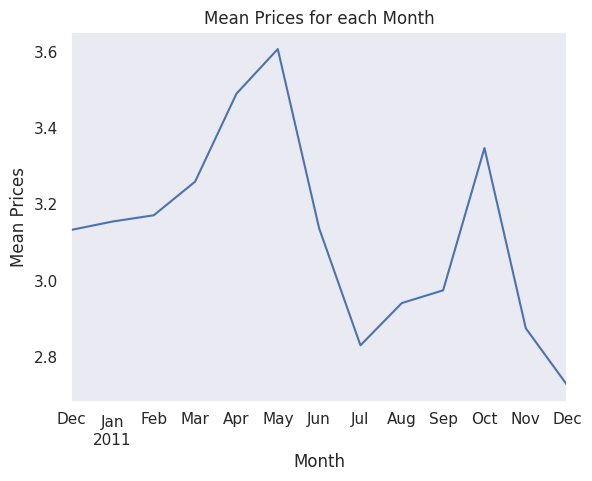

In [38]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='M'))['UnitPrice'].mean().plot(stacked=True)
plt.xlabel('Month')
plt.ylabel('Mean Prices')
plt.title('Mean Prices for each Month');

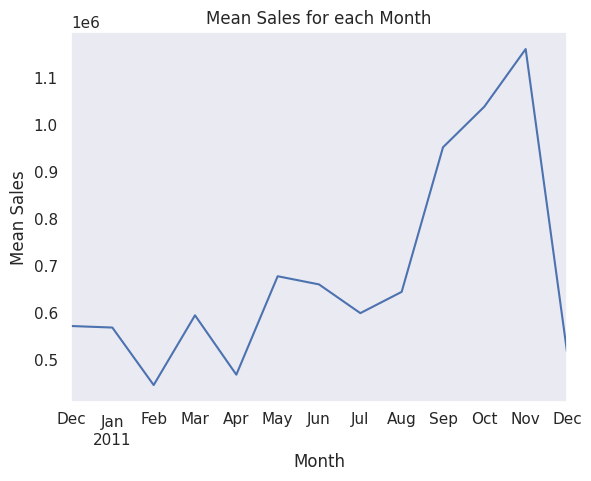

In [39]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='M'))['Sales'].sum().plot(stacked=True)
plt.xlabel('Month')
plt.ylabel('Mean Sales')
plt.title('Mean Sales for each Month');

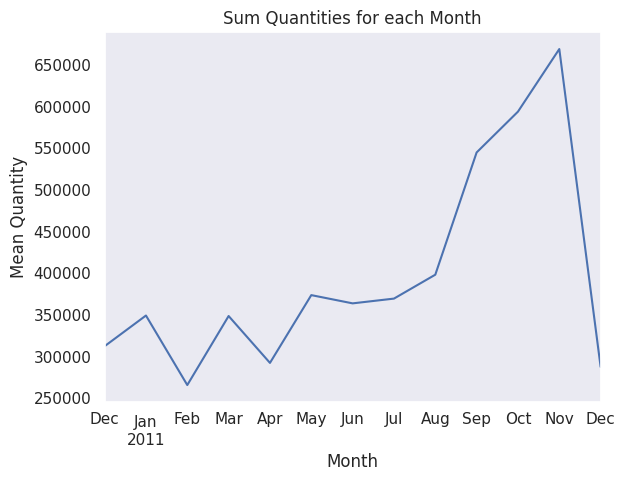

In [40]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='M')).sum()['Quantity'].plot(stacked=True)
plt.xlabel('Month')
plt.ylabel('Mean Quantity')
plt.title('Sum Quantities for each Month');

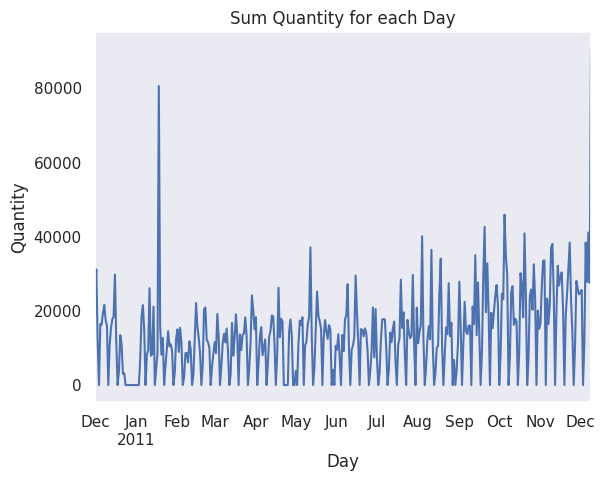

In [41]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='d')).sum()['Quantity'].plot(stacked=True)
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.title('Sum Quantity for each Day');

In [42]:
df['DayOfMonth'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

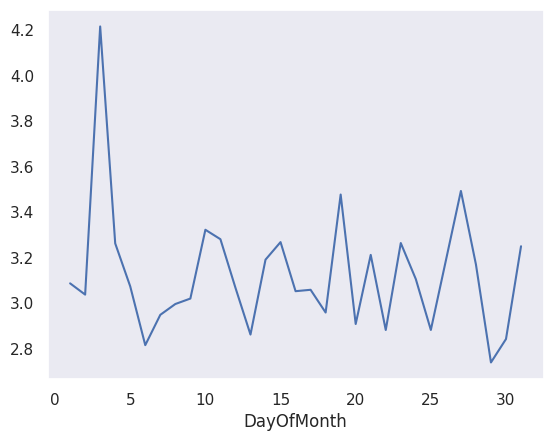

In [43]:
df.groupby('DayOfMonth')['UnitPrice'].mean().plot();

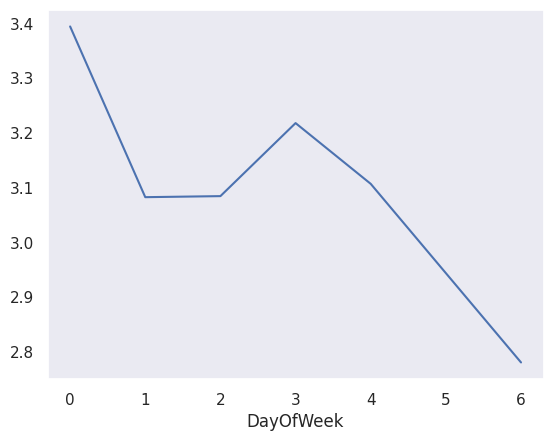

In [44]:
df.groupby('DayOfWeek')['UnitPrice'].mean().plot();

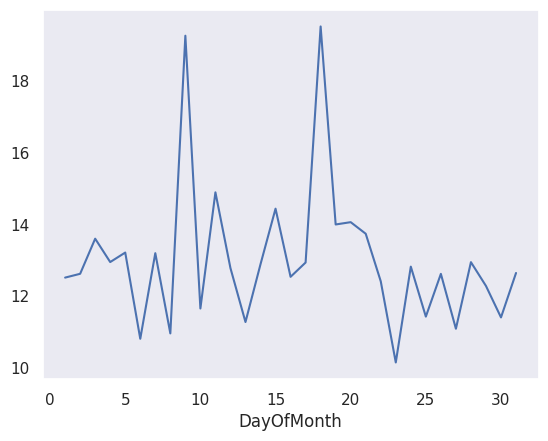

In [45]:
df.groupby('DayOfMonth')['Quantity'].mean().plot();

In [46]:
#Descriptions
df['Description'].nunique()

3877

In [47]:
df['Description'].value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: count, dtype: int64

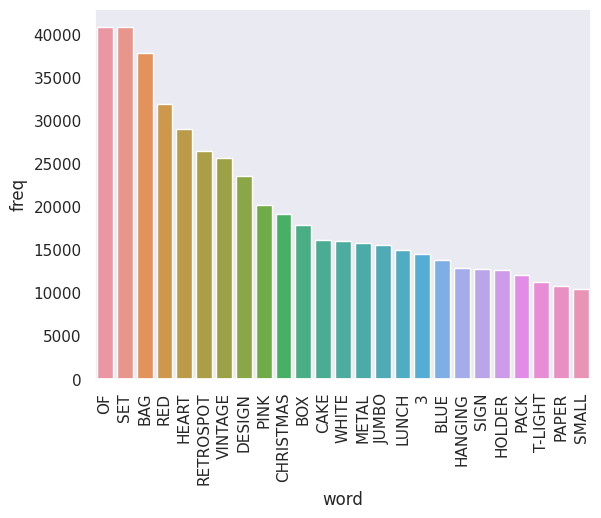

In [48]:
# Count and Plot the Occurence of the 
words = {}
descriptions = df['Description'].str.split().to_list()
for description in descriptions:
    for word in description:
        if word.upper() in words.keys():
            words[word.upper()] += 1
        else:
            words[word.upper()] = 1
sorted_words = sorted(words.items(), key=lambda item:item[1],reverse=True)
word_count= pd.DataFrame(sorted_words[:25],columns=['word','freq'])
sns.barplot(word_count,x='word',y='freq')
plt.xticks(rotation=90);

<Axes: >

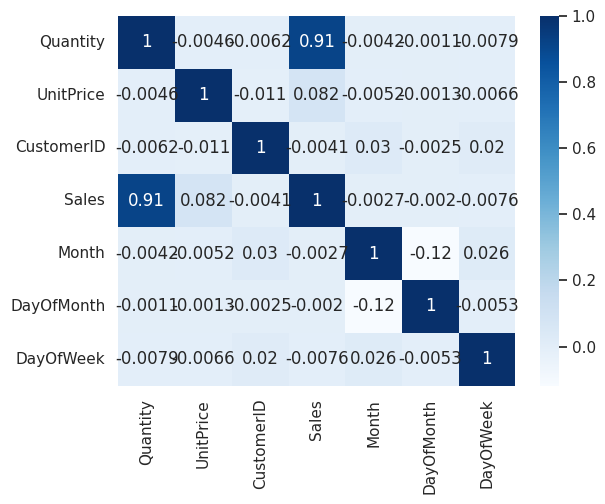

In [49]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True,cmap='Blues')

**Recency**

In [56]:
# Group the dataset by customerID and find the most recent purchase date for each customer
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index().rename(columns = {'InvoiceDate': 'LastPurchaseDate'})

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [57]:
latest_date = df['InvoiceDate'].max()

print(latest_date)

# Calculate the recency of each customer's last purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (latest_date - x).days)

# Display the first 10 rows of the recency dataframe
recency_df.head(10)

2011-12-09 12:50:00


,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309
5,12352.0,2011-11-03 14:37:00,35
6,12353.0,2011-05-19 17:47:00,203
7,12354.0,2011-04-21 13:11:00,231
8,12355.0,2011-05-09 13:49:00,213
9,12356.0,2011-11-17 08:40:00,22


In [58]:
# Drop the 'LastPurchaseDate' column from the dataframe
recency_df.drop('LastPurchaseDate', axis = 1, inplace = True)

recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


**Frequency**

In [59]:
# Group the data by customer ID and count the number of invoices for each customer
frequency_df = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo': 'Frequency'})

# Display the first 10 rows of the dataframe to inspect the results
frequency_df.head(10)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,85
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


**Monetary Value**

In [61]:
# Group the data by customer ID and sum the total amount spent by each customer
monetary_df = df.groupby('CustomerID')['Sales'].sum().reset_index().rename(columns = {'Sales': 'MonetaryValue'})

monetary_df.head()

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


**Combining recency, frequency, and monetary value information for each customer to provide a comprehensive overview of their behavior and spending habits.**

In [64]:
# Merge the recency and frequency dataframes on the customer ID column
tem_df = recency_df.merge(frequency_df, on = 'CustomerID')
rfm_df = tem_df.merge(monetary_df, on = 'CustomerID')
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


**> Customer Segmentation**

In [66]:
# Calculate quantiles for the RFM dataframe
quantiles = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].quantile(q = [0.25, 0.5, 0.75])
quantiles_dict = quantiles.transpose().to_dict()
quantiles

,Recency,Frequency,MonetaryValue
0.25,17.0,17.0,307.415
0.50,50.0,41.0,674.485
0.75,141.0,100.0,1661.740


In [70]:
# Create RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(4, 0, -1)))

# Create FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Create MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['MonetaryValue'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Concatenate the RecencyScore, FrequencyScore, and MonetaryScore columns into one RFMScore column
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

In [71]:
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,1,182,4310.00,4,4,4,444
2,12348.0,74,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,309,17,334.40,1,1,2,112


In [72]:
print('Best Customer', len(rfm_df[rfm_df['RFMScore'] == '444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore'] == 4]))
print("Big Spenders: ",len(rfm_df[rfm_df['MonetaryScore' ]== 4]))
print('Almost Lost: ', len(rfm_df[rfm_df['RFMScore'] =='244']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore'] == '144']))
print('Lost Cheap Customers: ',len(rfm_df[rfm_df['RFMScore'] == '111']))

Best Customer 447
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  101
Lost Customers:  21
Lost Cheap Customers:  385


In [75]:
rfm_data = rfm_df.drop(['RecencyScore', 'FrequencyScore', 'MonetaryScore','RFMScore'], axis = 1).set_index('CustomerID')

# Display the first 5 rows
display(rfm_data.head())
rfm_data.corr()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.206125,-0.122097
Frequency,-0.206125,1.000000,0.422129
MonetaryValue,-0.122097,0.422129,1.000000


<Axes: >

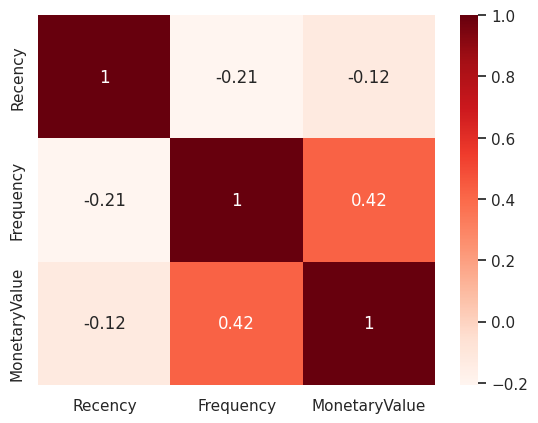

In [76]:
sns.heatmap(rfm_data.corr(), annot = True, cmap = 'Reds')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


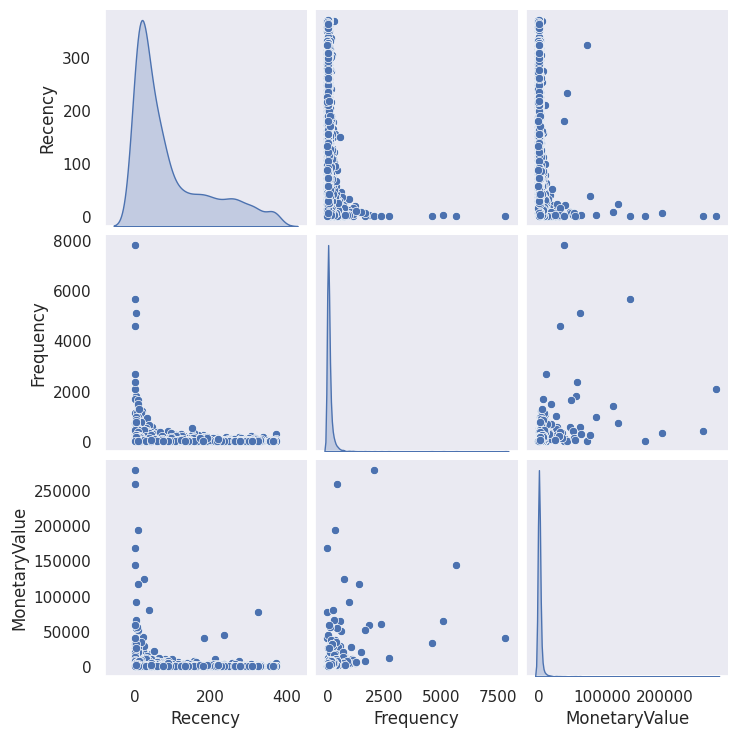

In [77]:
sns.pairplot(rfm_data, diag_kind = 'kde')

In [78]:
# logarithmic value of the Recency feature
rfm_r_log = np.log(rfm_data['Recency'] + 0.1)

# logarithmic value of the Monetary feature
rfm_m_log = np.log(rfm_data['MonetaryValue'] + 0.1)


# calculate the natural log of the 'Frequency' column
rfm_f_log = np.log(rfm_data['Frequency'])

In [79]:
log_data = pd.DataFrame({'Monetary' : rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12347.0,8.368716,0.095310,5.204007
12348.0,7.494063,4.305416,3.433987
12349.0,7.471733,2.895912,4.290459
12350.0,5.812637,5.733665,2.833213


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


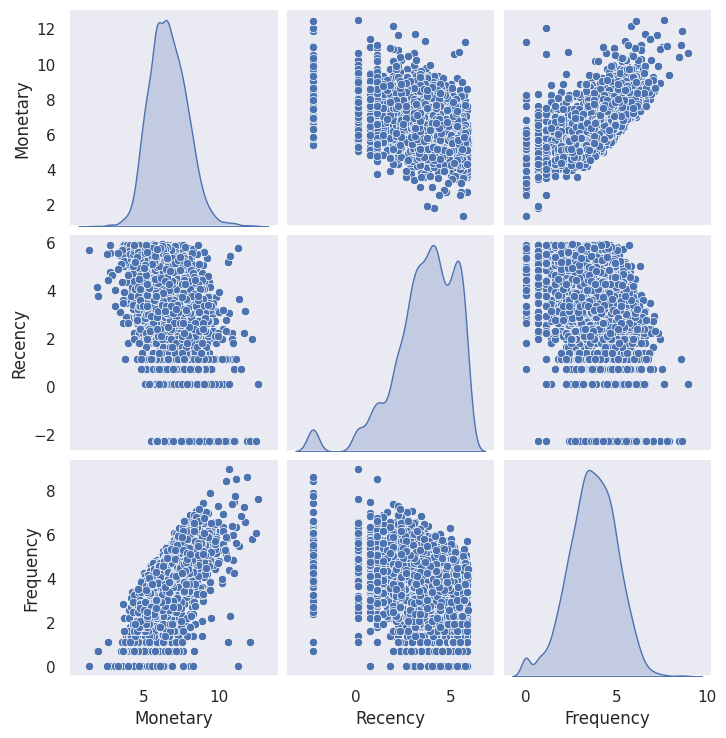

In [80]:
sns.pairplot(data = log_data, diag_kind = 'kde')

In [81]:
log_data.skew()

Monetary     0.382265
Recency     -1.171344
Frequency   -0.218240
dtype: float64

<Axes: >

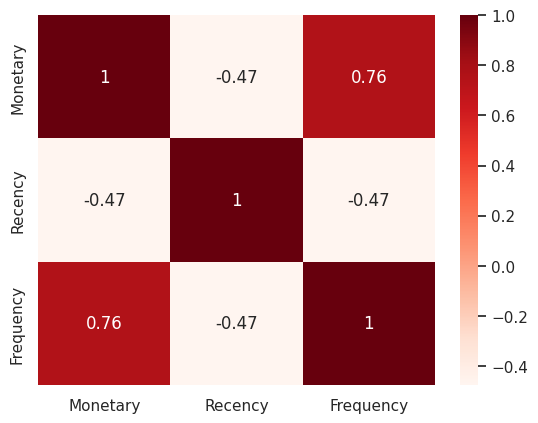

In [82]:
sns.heatmap(log_data.corr(), annot = True, cmap = 'Reds')

In [83]:
X = log_data

In [84]:
from sklearn.preprocessing import StandardScaler
# Define the features to use for K-means
features = ['Recency', 'Frequency', 'Monetary']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)

In [86]:

from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
  # Initialize the K-Means model with number of clusters
  kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters)

  # Fit the KMeans Model to the data
  kmeans.fit(X)

  # Predict the cluster labels for each data point
  labels = kmeans.labels_

  # Calculate the Silhouette score
  silhouette = silhouette_score(X, labels)

  # Append the silhouette_score to the array
  silhouette_scores.append(silhouette)

  # Print the silhouette score
  print(f'Silhouette score for {n_clusters} clusters: {silhouette:.3f}')

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 2 clusters: 0.395


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 3 clusters: 0.313


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 4 clusters: 0.276


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 5 clusters: 0.284


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 6 clusters: 0.270


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 7 clusters: 0.268


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 8 clusters: 0.260


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 9 clusters: 0.257


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 10 clusters: 0.264


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 11 clusters: 0.261


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 12 clusters: 0.266


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 13 clusters: 0.261


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 14 clusters: 0.261


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 15 clusters: 0.262


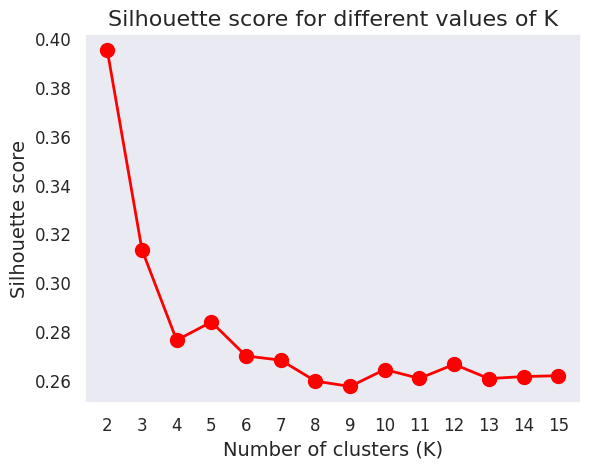

In [87]:
plt.plot(range(2, 16), silhouette_scores, '-o', color='red', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [88]:
kmeans = KMeans(n_clusters = 2)


# Fit the input data X to the Mean Model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


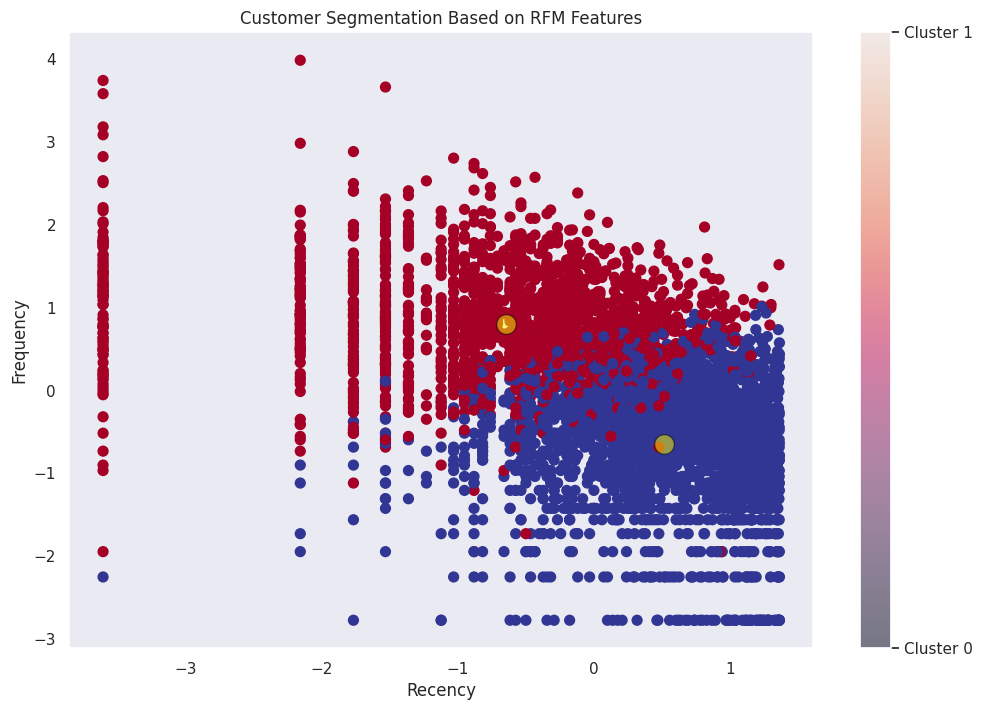

In [89]:
# Visualization of customer segmentation based On RFM features.
# Set the figure size and title for the scatter plot
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add a color bar to the plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

# Show the plot
plt.show()

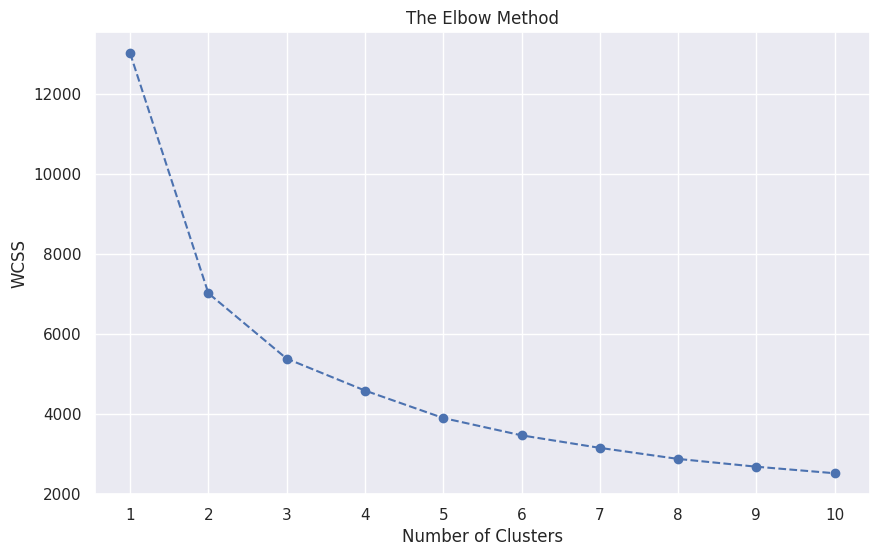

In [90]:
#K-Means with Elbow method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Create a KMeans instance for each number of clusters
    kmeans.fit(X)  # Fit the KMeans model to the input data X
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list for the current number of clusters

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [91]:
#Agglomerative Hierarchial Clustering
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 2 clusters, euclidean affinity, and ward linkage
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the input data X to the model
model.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

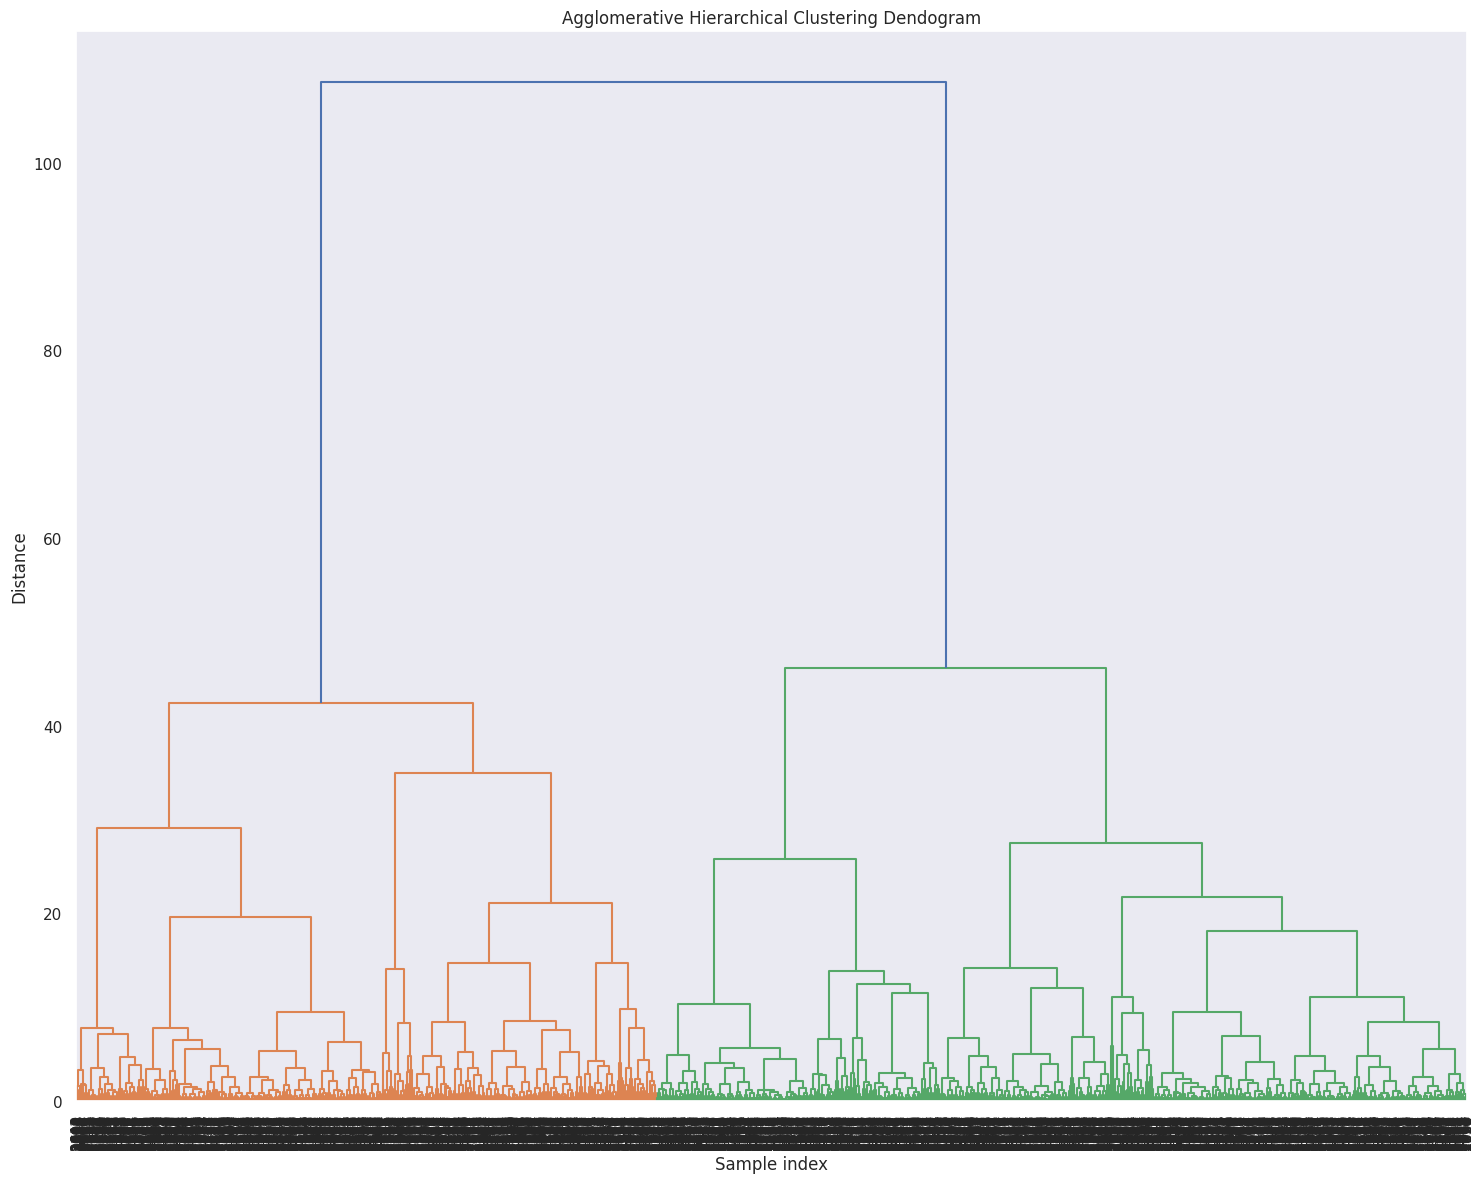

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set the figure size and title for the dendrogram plot
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

# Set the x and y-axis labels for the dendrogram plot
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix using the input data X and the ward linkage method
Z = linkage(X, 'ward')

# Plot the dendrogram with specified parameters
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')

# Ensure tight layout of the plot
plt.tight_layout()

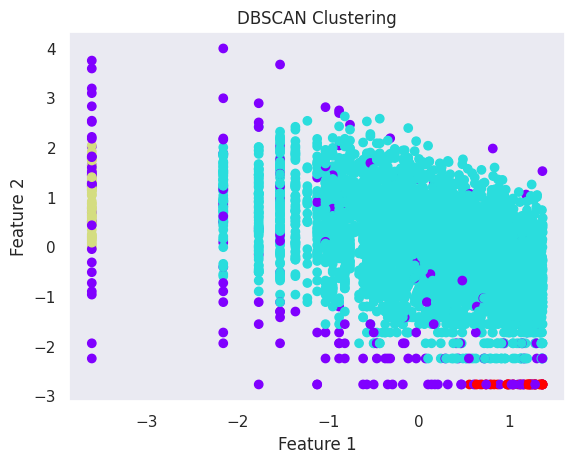

In [93]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan.fit(X)

# Plot the results
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [94]:
# Import necessary libraries
from prettytable import PrettyTable

# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"])

# Add rows to the table
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "2"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "2"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "2"])
myTable.add_row(['4',"DBSCAN ", "RFM", "3"])

# Print the table
print(myTable)

+--------+-------------------------------+------+---------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score | RFM  |             2             |
|   2    |   K-Means with Elbow method   | RFM  |             2             |
|   3    |    Hierarchical clustering    | RFM  |             2             |
|   4    |            DBSCAN             | RFM  |             3             |
+--------+-------------------------------+------+---------------------------+


In [102]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


df_ = df.drop(columns=['Description','InvoiceDate','CustomerID','InvoiceNo','Quarter'])
df_ = df_[(df_['Country'].isin(top_countries)) & (df_['StockCode'].isin(top_stock))]
X = df_.drop(columns=['Quantity'])
y = df_['Quantity']
X = pd.get_dummies(X, columns=X.select_dtypes('object').columns,drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [76]:
X_scaled.std()

1.0000000000000004

In [106]:
X_train.shape, X_test.shape,

((38608, 63), (9653, 63))

In [107]:
y_train.shape, y_test.shape

((38608,), (9653,))

In [108]:
X_scaled.shape

(48261, 63)

In [103]:
import torch
from torch import nn

class Data(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y.values)
        
    def __len__(self): return len(self.X)
    
    def __getitem__(self,i): return (self.X[i], self.y[i])
    

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(63,164),
            nn.Tanh(),
            nn.Linear(164,32),
            nn.ReLU(),
            nn.Linear(32,1)
        )
        
    def forward(self, X):
        return self.layer(X)

In [104]:
NN = NeuralNetwork()

In [105]:
train_dataset = Data(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8)

In [106]:
optimizer = torch.optim.Adam(NN.parameters(), lr=1e-3,weight_decay=1e-2)
cost = nn.MSELoss()
past_trainig_loss = 0
epochs = 100
for epoch in range(epochs):
    total_training_loss = 0
    for i, data in enumerate(train_loader,0):
        features,target = data
        features,target = features.float(),target.float()
        target = target.reshape(-1,1)
        optimizer.zero_grad()
        pred = NN.forward(features)
        loss = cost(pred,target)
        total_training_loss += loss.item()
        loss.backward()
        optimizer.step()
    past_trainig_loss = total_training_loss - past_trainig_loss
    print(f'Epoch Number : [{str(epoch+1).zfill(2)}]  Training Loss = {total_training_loss} | Difference = {past_trainig_loss}')
    past_trainig_loss = total_training_loss

Epoch Number : [01]  Training Loss = 7139734.162426382 | Difference = 7139734.162426382
Epoch Number : [02]  Training Loss = 3586237.5147319436 | Difference = -3553496.6476944387
Epoch Number : [03]  Training Loss = 2536948.7262076437 | Difference = -1049288.7885242999
Epoch Number : [04]  Training Loss = 1945670.306571491 | Difference = -591278.4196361527
Epoch Number : [05]  Training Loss = 1627778.6831132397 | Difference = -317891.62345825136
Epoch Number : [06]  Training Loss = 1373180.1543183029 | Difference = -254598.52879493684
Epoch Number : [07]  Training Loss = 1239723.1963020638 | Difference = -133456.9580162391
Epoch Number : [08]  Training Loss = 1088780.8975145668 | Difference = -150942.29878749698
Epoch Number : [09]  Training Loss = 975308.5256229416 | Difference = -113472.37189162523
Epoch Number : [10]  Training Loss = 837272.2624347694 | Difference = -138036.26318817213
Epoch Number : [11]  Training Loss = 845245.276099965 | Difference = 7973.0136651955545
Epoch Numb

In [107]:
preds = NN.forward(torch.from_numpy(X_test).float())
preds = preds.detach().numpy().reshape(-1,)
result = pd.DataFrame(
    {
        'Actual':y_test,
        'Prediction':np.round(preds).astype(int)

    }
)
result.head(10)

,Actual,Prediction
140447,12,12
408608,1,2
446433,2,2
345295,2,3
392542,3,3
506557,4,4
306161,1,1
189286,12,13
424444,36,38
1428,30,33


In [108]:
from sklearn.metrics import r2_score

r2_score(y_test,preds)

0.975706321627621